In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing our data
# https://www.kaggle.com/datasets/lava18/google-play-store-apps
df=pd.read_csv('/content/drive/MyDrive/googleplaystore.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_day,Last_Updated_month,Last_Updated_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,10000.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,500000.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,5000000.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,50000000.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,100000.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0


In [3]:
#Total rows and columns in our dataset
df.shape

(10841, 17)

In [4]:
#information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10841 non-null  int64  
 1   App                 10841 non-null  object 
 2   Category            10841 non-null  object 
 3   Rating              9367 non-null   float64
 4   Reviews             10841 non-null  int64  
 5   Size                9146 non-null   float64
 6   Installs            10840 non-null  float64
 7   Type                10840 non-null  object 
 8   Price               10840 non-null  float64
 9   Content Rating      10840 non-null  object 
 10  Genres              10841 non-null  object 
 11  Last Updated        10840 non-null  object 
 12  Current Ver         10833 non-null  object 
 13  Android Ver         10838 non-null  object 
 14  Last_Updated_day    10840 non-null  float64
 15  Last_Updated_month  10840 non-null  float64
 16  Last

In [5]:
#Getting information about all the numerical columns in our dataset
df.describe()

,Unnamed: 0,Rating,Reviews,Size,Installs,Price,Last_Updated_day,Last_Updated_month,Last_Updated_year
count,10841.000000,9367.000000,1.084100e+04,9146.000000,1.084000e+04,1.084000e+04,10840.000000,10840.000000,10840.000000
mean,5420.000000,4.193338,4.441119e+05,19577.388487,1.546434e+07,1.546434e+07,15.609041,6.422325,2017.399723
std,3129.671468,0.537431,2.927629e+06,24041.532453,8.502936e+07,8.502936e+07,9.561621,2.578388,1.100914
min,0.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,2010.000000
25%,2710.000000,4.000000,3.800000e+01,5.600000,1.000000e+03,1.000000e+03,6.000000,5.000000,2017.000000
50%,5420.000000,4.300000,2.094000e+03,13000.000000,1.000000e+05,1.000000e+05,16.000000,7.000000,2018.000000
75%,8130.000000,4.500000,5.476800e+04,30000.000000,5.000000e+06,5.000000e+06,24.000000,8.000000,2018.000000
max,10840.000000,19.000000,7.815831e+07,100000.000000,1.000000e+09,1.000000e+09,31.000000,12.000000,2018.000000


In [6]:
#Finding toatal number of missing values columnwise
df.isnull().sum()

,0
Unnamed: 0,0
App,0
Category,0
Rating,1474
Reviews,0
Size,1695
Installs,1
Type,1
Price,1
Content Rating,1


###Insights and observations
#####Our data do contain missing values


DATA CLEANING

In [7]:
df.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_day,Last_Updated_month,Last_Updated_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,10000.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,500000.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0


In [8]:
df['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [9]:
# df['Reviews'].astype(int)
# Here we got the error: "ValueError: invalid literal for int() with base 10: '3.0M"
#Tackling the error

In [10]:
# Creating a copy of our dataset
df_copy=df.copy()

In [11]:
df_copy['Reviews'] = df_copy['Reviews'].astype(str)
df_copy['Reviews'].str.isnumeric().sum()

10841

In [12]:
# Checking the row which is not numeric
df_copy[~df_copy['Reviews'].str.isnumeric()]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_day,Last_Updated_month,Last_Updated_year


In [13]:
# Dropping the non-numeric row is one option
# df_copy=df_copy.drop(df_copy.index[10472])
# Checking whether the row is dropped or not
# df_copy[~df_copy['Reviews'].str.isnumeric()]

In [14]:
# other option
df_copy['Reviews']=df_copy['Reviews'].str.replace('3.0M','3')

In [15]:
df_copy[~df_copy['Reviews'].str.isnumeric()]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_day,Last_Updated_month,Last_Updated_year


In [16]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [17]:
df_copy.iloc[10472]

,10472
Unnamed: 0,10472
App,Life Made WI-Fi Touchscreen Photo Frame
Category,1.9
Rating,19.0
Reviews,3
Size,1000.0
Installs,NaN
Type,0
Price,NaN
Content Rating,NaN


In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10841 non-null  int64  
 1   App                 10841 non-null  object 
 2   Category            10841 non-null  object 
 3   Rating              9367 non-null   float64
 4   Reviews             10841 non-null  int64  
 5   Size                9146 non-null   float64
 6   Installs            10840 non-null  float64
 7   Type                10840 non-null  object 
 8   Price               10840 non-null  float64
 9   Content Rating      10840 non-null  object 
 10  Genres              10841 non-null  object 
 11  Last Updated        10840 non-null  object 
 12  Current Ver         10833 non-null  object 
 13  Android Ver         10838 non-null  object 
 14  Last_Updated_day    10840 non-null  float64
 15  Last_Updated_month  10840 non-null  float64
 16  Last

In [19]:
df_copy['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

In [20]:
df_copy['Size'].isnull().sum()

1695

In [21]:
df_copy['Size'] = df_copy['Size'].astype(str)
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k',' ')
df_copy['Size']=df_copy['Size'].str.replace('+','')
df_copy['Size']=df_copy['Size'].str.replace(',','')

In [22]:
df_copy['Size'].unique()

array(['19000.0', '14000.0', '8.7', '25000.0', '2.8', '5.6', '29000.0',
       '33000.0', '3.1', '28000.0', '12000.0', '20000.0', '21000.0',
       '37000.0', '2.7', '5.5', '17000.0', '39000.0', '31000.0', '4.2',
       '7.0', '23000.0', '6.0', '6.1', '4.6', '9.2', '5.2', '11000.0',
       '24000.0', 'nan', '9.4', '15000.0', '10000.0', '1.2', '26000.0',
       '8.0', '7.9', '56000.0', '57000.0', '35000.0', '54000.0', '201.0',
       '3.6', '5.7', '8.6', '2.4', '27000.0', '2.5', '16000.0', '3.4',
       '8.9', '3.9', '2.9', '38000.0', '32000.0', '5.4', '18000.0', '1.1',
       '2.2', '4.5', '9.8', '52000.0', '9.0', '6.7', '30000.0', '2.6',
       '7.1', '3.7', '22000.0', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13000.0', '73000.0', '6.8', '3.5', '4.0',
       '2.3', '7.2', '2.1', '42000.0', '7.3', '9.1', '55000.0', '23.0',
       '6.5', '1.5', '7.5', '51000.0', '41000.0', '48000.0', '8.5',
       '46000.0', '8.3', '4.3', '4.7', '3.3', '40000.0', '7.8', '8.8

In [23]:
df_copy['Size']=df_copy['Size'].str.replace('Varies with device','NaN')

In [24]:
df_copy['Size']=df_copy['Size'].astype(float)

In [25]:
df_copy['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00,    nan])

In [26]:
df_copy['Price'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00,    nan])

In [27]:
df_copy[['Price','Installs']] =df_copy[['Price','Installs']] .astype(str)

In [28]:
chars_to_remove=['+','$',',','Everyone','Free']
cols_to_clean=['Price','Installs']

In [29]:
for items in chars_to_remove:
  for cols in cols_to_clean:
    df_copy[cols]=df_copy[cols].str.replace(items,"")

In [30]:
df_copy['Installs'].unique()

array(['10000.0', '500000.0', '5000000.0', '50000000.0', '100000.0',
       '50000.0', '1000000.0', '10000000.0', '5000.0', '100000000.0',
       '1000000000.0', '1000.0', '500000000.0', '50.0', '100.0', '500.0',
       '10.0', '1.0', '5.0', '0.0', 'nan'], dtype=object)

In [31]:
df_copy['Price'].unique()

array(['10000.0', '500000.0', '5000000.0', '50000000.0', '100000.0',
       '50000.0', '1000000.0', '10000000.0', '5000.0', '100000000.0',
       '1000000000.0', '1000.0', '500000000.0', '50.0', '100.0', '500.0',
       '10.0', '1.0', '5.0', '0.0', 'nan'], dtype=object)

In [32]:
df_copy['Installs'] = df_copy['Installs'].str.replace(' ','')
df_copy['Price'] = df_copy['Installs'].str.replace(' ','')

In [33]:
# Replace empty strings with NaN before converting to float
df_copy['Installs'] = df_copy['Installs'].replace('', np.nan)
df_copy['Price'] = df_copy['Installs'].replace('', np.nan)


In [34]:
df_copy['Installs']=df_copy['Installs'].astype(float)
df_copy['Price']=df_copy['Price'].astype(float)

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10841 non-null  int64  
 1   App                 10841 non-null  object 
 2   Category            10841 non-null  object 
 3   Rating              9367 non-null   float64
 4   Reviews             10841 non-null  int64  
 5   Size                9146 non-null   float64
 6   Installs            10840 non-null  float64
 7   Type                10840 non-null  object 
 8   Price               10840 non-null  float64
 9   Content Rating      10840 non-null  object 
 10  Genres              10841 non-null  object 
 11  Last Updated        10840 non-null  object 
 12  Current Ver         10833 non-null  object 
 13  Android Ver         10838 non-null  object 
 14  Last_Updated_day    10840 non-null  float64
 15  Last_Updated_month  10840 non-null  float64
 16  Last

In [36]:
df_copy['Last Updated'].unique()

array(['2018-01-07', '2018-01-15', '2018-08-01', ..., '2014-01-20',
       '2014-02-16', '2014-03-23'], dtype=object)

In [37]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'], errors='coerce')

In [38]:
df_copy['Last_Updated_day']=df_copy['Last Updated'].dt.day
df_copy['Last_Updated_month']=df_copy['Last Updated'].dt.month
df_copy['Last_Updated_year']=df_copy['Last Updated'].dt.year

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          10841 non-null  int64         
 1   App                 10841 non-null  object        
 2   Category            10841 non-null  object        
 3   Rating              9367 non-null   float64       
 4   Reviews             10841 non-null  int64         
 5   Size                9146 non-null   float64       
 6   Installs            10840 non-null  float64       
 7   Type                10840 non-null  object        
 8   Price               10840 non-null  float64       
 9   Content Rating      10840 non-null  object        
 10  Genres              10841 non-null  object        
 11  Last Updated        10840 non-null  datetime64[ns]
 12  Current Ver         10833 non-null  object        
 13  Android Ver         10838 non-null  object    

In [40]:
# Storing the cleaned data in a folder
df_copy.to_csv('/content/drive/MyDrive/googleplaystore.csv')

After cleaning our data we are performing EDA (Exploratory Data Analysis)

###EDA

In [41]:
df_copy.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_day,Last_Updated_month,Last_Updated_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,10000.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7.0,1.0,2018.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,500000.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15.0,1.0,2018.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,5000000.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1.0,8.0,2018.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,50000000.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8.0,6.0,2018.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,100000.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20.0,6.0,2018.0


In [42]:
# Checking if the duplicated records exists in our data
df_copy[df_copy.duplicated('App')]


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_day,Last_Updated_month,Last_Updated_year
229,229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,5000000.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26.0,2.0,2018.0
236,236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,10000000.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31.0,7.0,2018.0
239,239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,5000000.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24.0,7.0,2018.0
256,256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000.0,Free,10000000.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20.0,7.0,2018.0
261,261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,1000000.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16.0,7.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000.0,Free,100000.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25.0,2.0,2016.0
10720,10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000.0,Free,1000000.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6.0,7.0,2018.0
10730,10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000.0,Free,50000.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24.0,3.0,2018.0
10753,10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000.0,Free,1000000.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30.0,7.0,2018.0


###Observation
The dataset have duplicated records

In [43]:
# Deleting Duplicated records
df_copy.drop_duplicates(subset=['App'],keep='first',inplace=True)

In [44]:
df_copy.shape

(9660, 17)

###Exploring Data

In [45]:
# Separating the numerical and categorical features (use any of the following 2 approaches)

# Approach--1

numeric_feature=[]
categorical_feature=[]
for col in df_copy.columns:
  if df_copy[col].dtype=='object':
    categorical_feature.append(col)
  else:
    numeric_feature.append(col)

In [46]:
# Approach--2
# categorical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype=='object']
# numeric_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype!='object']

In [47]:
print("We've {} numerical features and they are:-{}".format(len(numeric_feature),numeric_feature))
print("We've {} categorical features and they are:-{}".format(len(categorical_feature),categorical_feature))

We've 10 numerical features and they are:-['Unnamed: 0', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Last_Updated_day', 'Last_Updated_month', 'Last_Updated_year']
We've 7 categorical features and they are:-['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


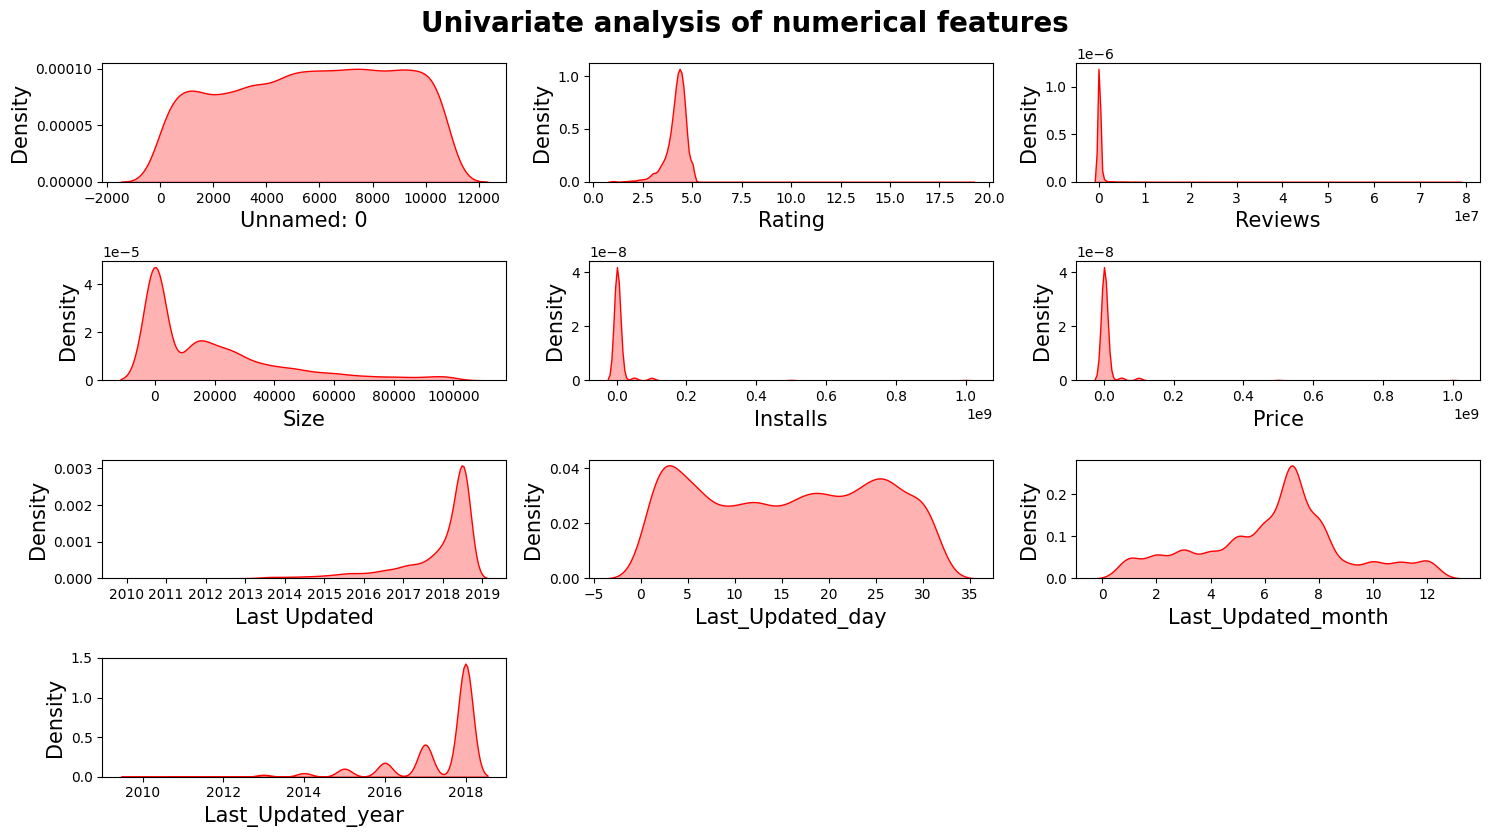

In [48]:

# portion of count data on numerical columns
plt.figure(figsize=(15,10))
plt.suptitle("Univariate analysis of numerical features",fontsize = 20,fontweight='bold')
for i in range(0,len(numeric_feature)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(data=df_copy,x=df_copy[numeric_feature[i]],fill=True,color='r',alpha=0.3,warn_singular=False)
  plt.ylabel('Density',fontsize=15)
  plt.xlabel(numeric_feature[i],fontsize=15)
  plt.tight_layout()


###Observations
Ratings & last updated year are both left skewed data   

Installs, Price Reviews and size are all right skewed data










Frequency Table for Type:
Type
Free    8902
Paid     756
0          1
Name: count, dtype: int64




<ipython-input-49-e7c73c74fbbc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x=column, order=df_copy[column].value_counts().index,  palette="viridis")


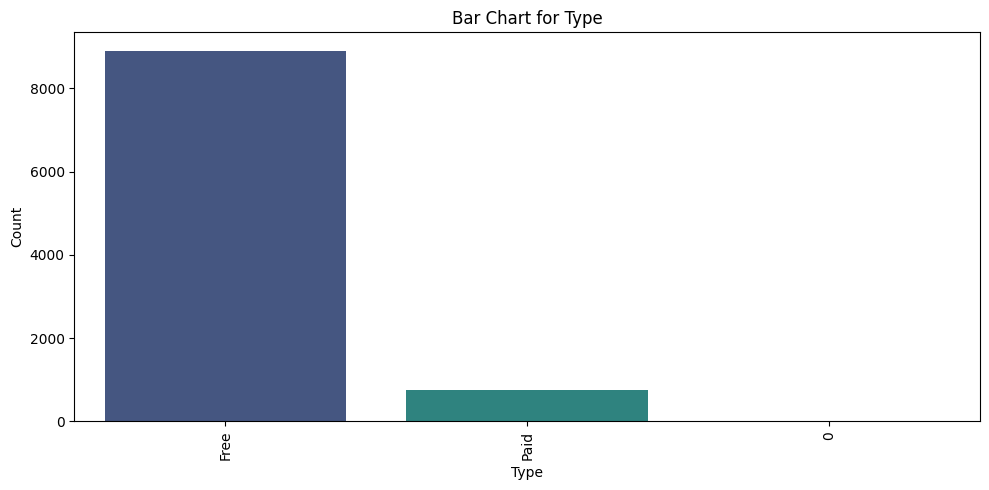

Frequency Table for Content Rating:
Content Rating
Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64




<ipython-input-49-e7c73c74fbbc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x=column, order=df_copy[column].value_counts().index,  palette="viridis")


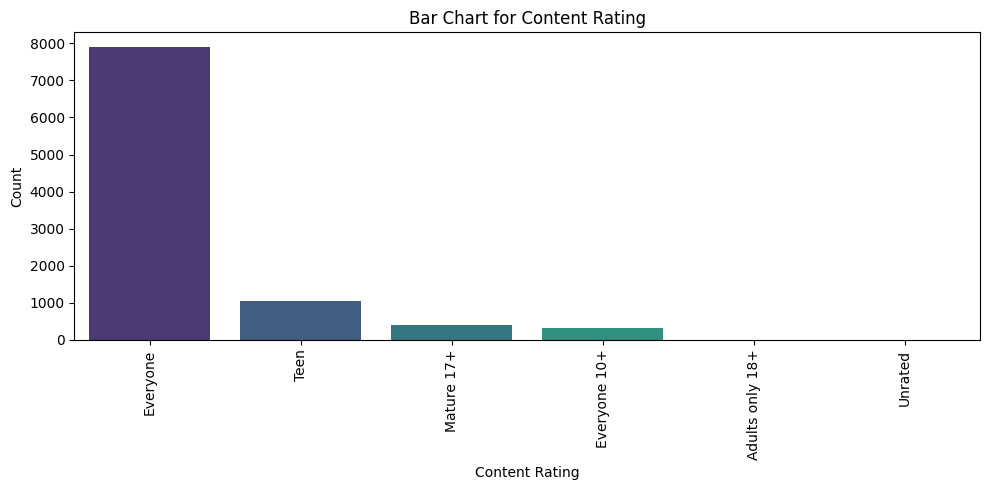

In [49]:
# Categorical columns Univariate analysis
categorical_featurez=['Type','Content Rating']

for column in categorical_featurez:
    # Frequency Table
    print(f"Frequency Table for {column}:")

    print(df_copy[column].value_counts())
    print("\n")  # Add an empty line for readability

    # Bar Chart
    plt.figure(figsize=(10, 5))  # Adjust figure size if needed
    sns.countplot(data=df_copy, x=column, order=df_copy[column].value_counts().index,  palette="viridis")

    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Bar Chart for {column}")
    plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
    plt.tight_layout()
    plt.show()

<Axes: ylabel='count'>

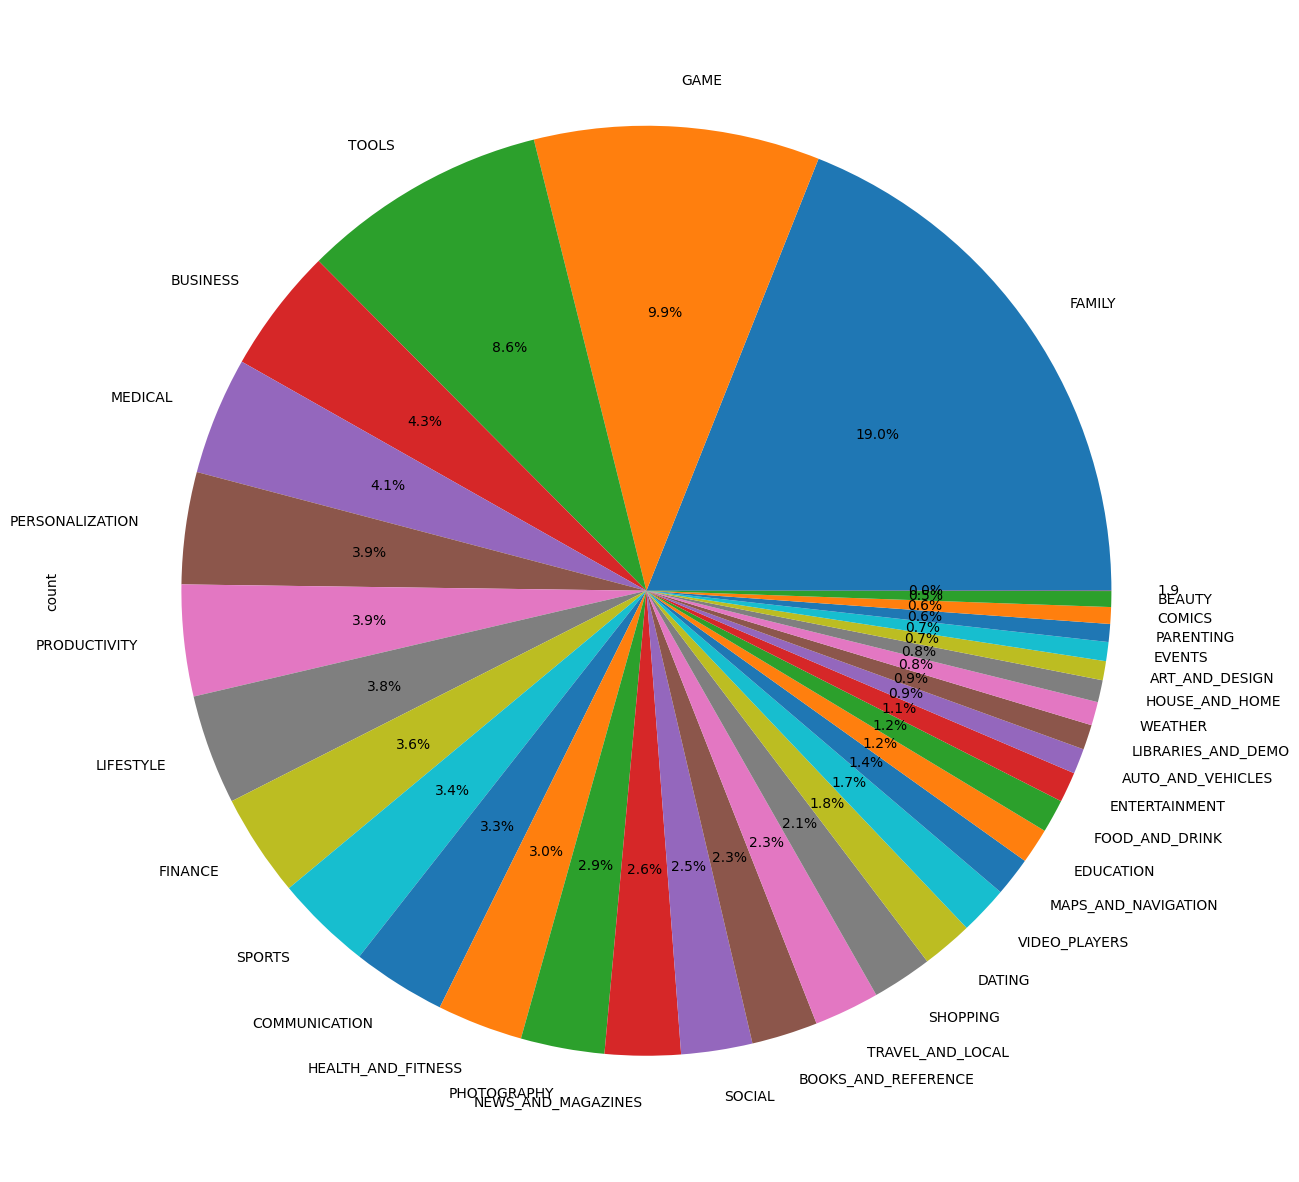

In [50]:
# piechart
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f%%')


###Observation


*   There are more kinds of app under family,games and tools
*   There are less kinds of under beauty,comic and weather category



In [51]:
# Sorting the dataset in ascending order
# category_counts=df_copy['Category'].value_counts(ascending=True)
# category_counts

<ipython-input-52-49f5595779db>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_df['Category'][:10], y=category_df['Count'][:10], palette='hls')


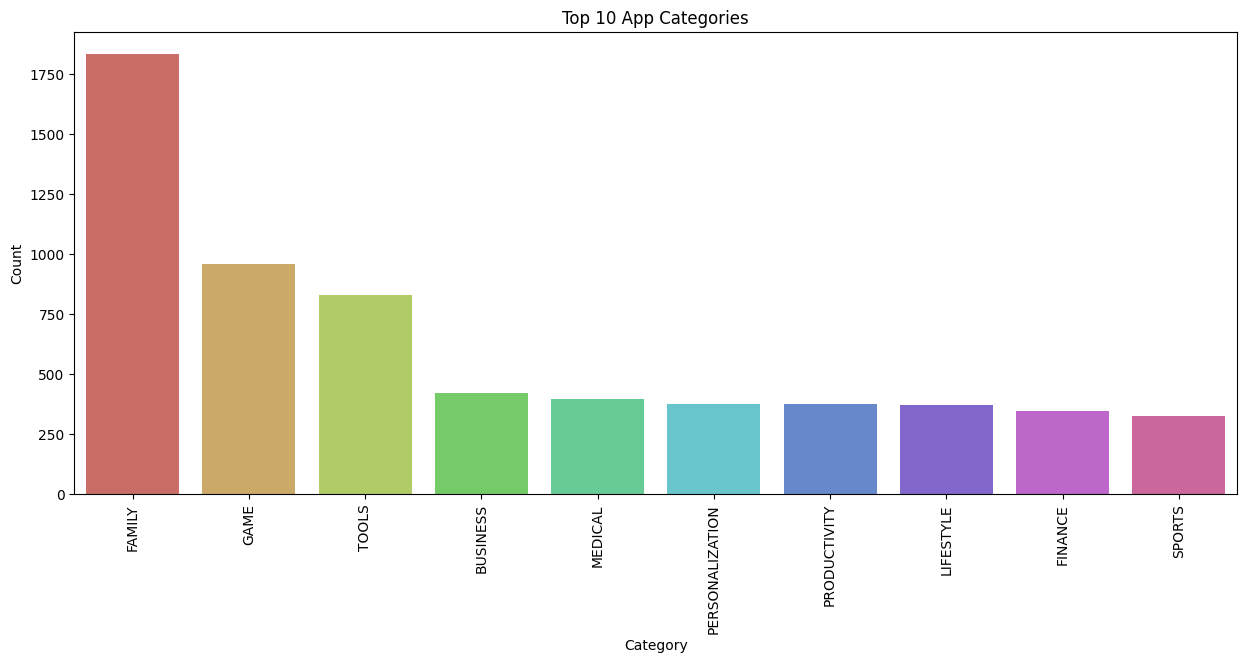

In [52]:

category_counts = df_copy['Category'].value_counts()

# Resetting the index to create a DataFrame for easier handling
category_df = category_counts.reset_index()
category_df.columns = ['Category', 'Count']

# Plotting the top 10 categories
plt.figure(figsize=(15, 6))
sns.barplot(x=category_df['Category'][:10], y=category_df['Count'][:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [53]:
category_df

,Category,Count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [54]:
# Most popular category by installs
df_cat_installs=df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()
df_cat_installs

,Category,Installs
0,GAME,1.387892e+10
1,COMMUNICATION,1.103828e+10
2,TOOLS,8.001772e+09
3,PRODUCTIVITY,5.793091e+09
4,SOCIAL,5.487868e+09
5,PHOTOGRAPHY,4.649148e+09
6,FAMILY,4.427942e+09
7,VIDEO_PLAYERS,3.926903e+09
8,TRAVEL_AND_LOCAL,2.894887e+09
9,NEWS_AND_MAGAZINES,2.369218e+09


In [55]:
# converting into billions
df_cat_installs.Installs = df_cat_installs.Installs/100000000


Text(0.5, 1.0, 'Most Popular Categories in Play Store')

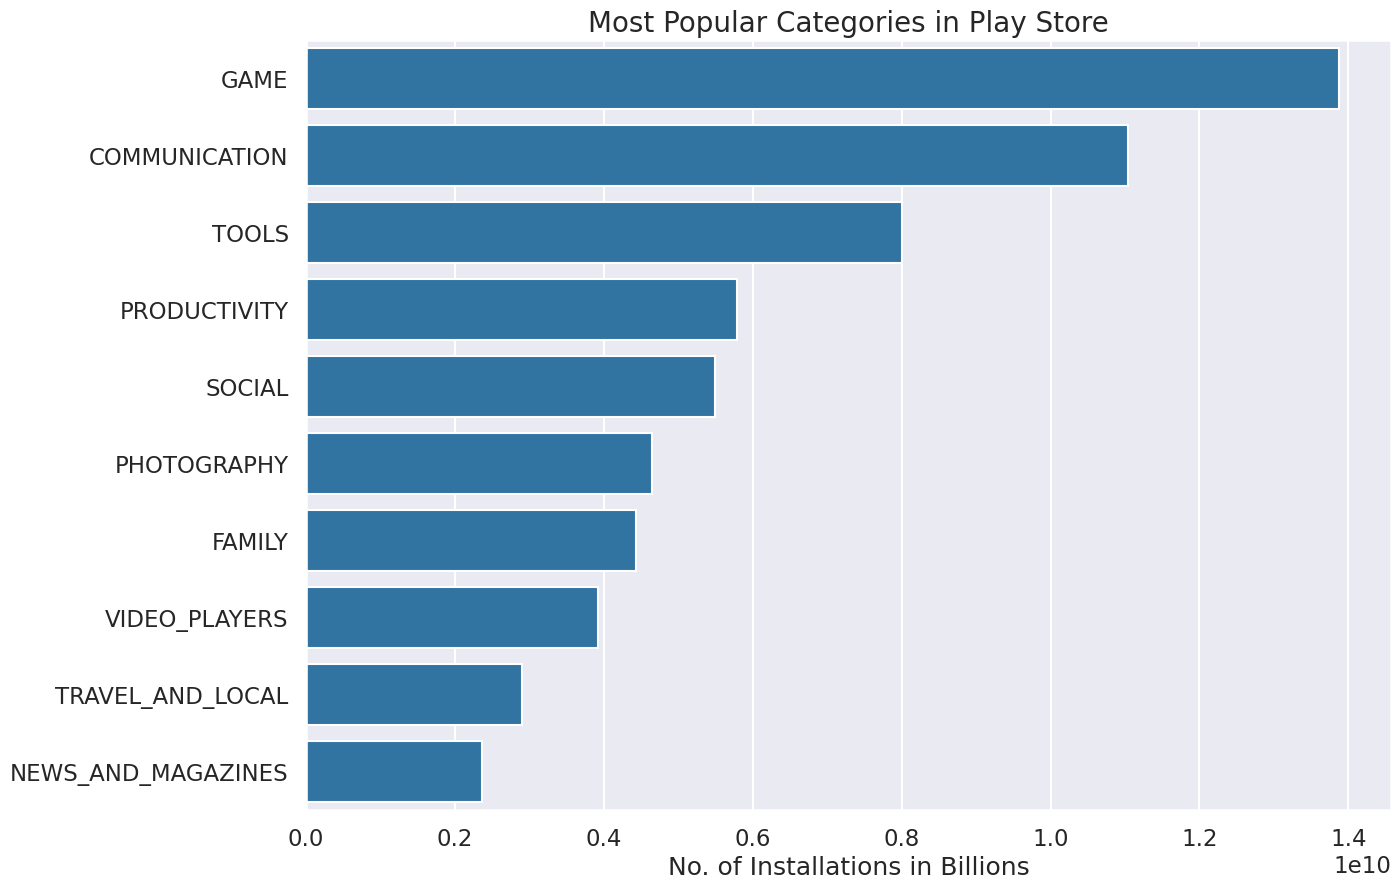

In [56]:
# Category with largest number of installs
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

## Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 35 Billion Installations GAME is the most popular Category in Google App store

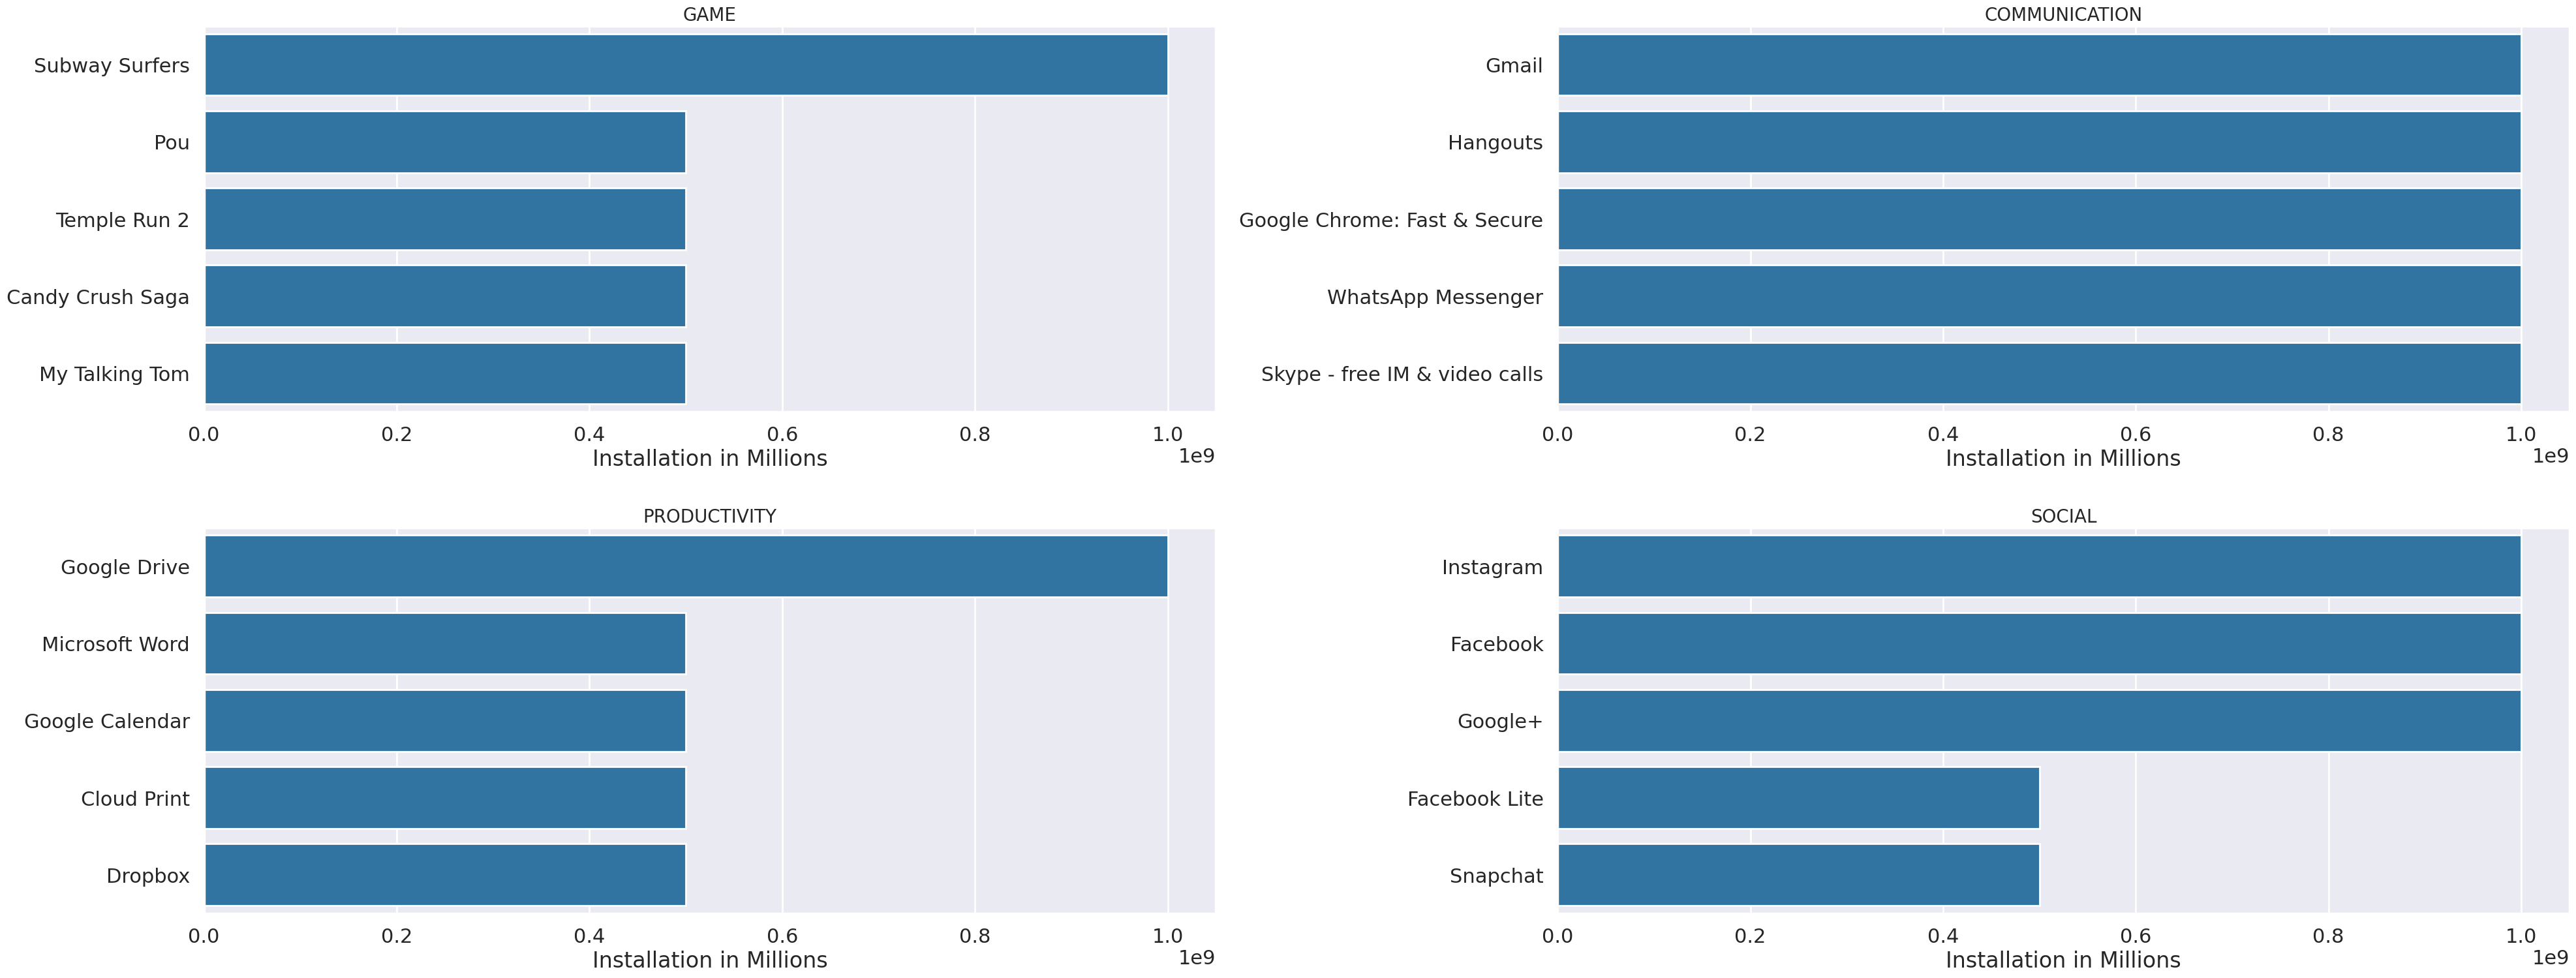

In [57]:
# Top 5 most installed apps in each category
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## Insights
- Most popular game is Subway Surfers.
- Most popular communication app is Hangouts.
- Most popular productivity app is Google Drive.
- Most popular social app is Instagram.

In [58]:
#  Apps on Google Play Store which get 5 ratings
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5 rated apps",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5 rated apps 271


,Category,Installs,App,Rating
0,FAMILY,1000.0,CS & IT Interview Questions,5.0


## Result
- There are 271 five rated apps on Google Play store
- Top most is 'CT Brain Interpretation' from 'Family' Category
